# Unsupevised Machine Learning Models

**Goal 1: Report top three single items frequent item sets and top three two item frequent item sets.**  
Data: [supermarket data](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/supermarket_extracted.csv)

**Goal 2: Identify five states that are in a cluster with the lowest amount of crime.**  
Data: [crime data](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/state_crime_data.csv)

**Goal 3: Use k-NN classification to accomplish a similar outcome as goal 2.**  
Data: [glass data](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/glass_data.csv)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# reading in supermarket dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/supermarket_extracted.csv"
supermarket_data = pd.read_csv(url)

In [3]:
# shuffling dataset
supermarket_data = supermarket_data.iloc[:, 1:].sample(frac = 1).reset_index(drop = True)

In [4]:
# first five rows
supermarket_data.head()

,desserts,meats,juices,paper_goods,frozen_foods,snack_foods,canned goods,beer_wine_spirits,dairy,breads,produce
0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,1
4,0,0,0,1,1,1,0,1,0,0,0


In [5]:
# general variable info
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108131 entries, 0 to 108130
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   desserts           108131 non-null  int64
 1   meats              108131 non-null  int64
 2   juices             108131 non-null  int64
 3   paper_goods        108131 non-null  int64
 4   frozen_foods       108131 non-null  int64
 5   snack_foods        108131 non-null  int64
 6   canned goods       108131 non-null  int64
 7   beer_wine_spirits  108131 non-null  int64
 8   dairy              108131 non-null  int64
 9   breads             108131 non-null  int64
 10  produce            108131 non-null  int64
dtypes: int64(11)
memory usage: 9.1 MB


In [6]:
# retrieving general statistics for numerical variables
supermarket_data.describe()

,desserts,meats,juices,paper_goods,frozen_foods,snack_foods,canned goods,beer_wine_spirits,dairy,breads,produce
count,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000,108131.000000
mean,0.311622,0.327390,0.219613,0.322470,0.329378,0.337896,0.060713,0.338534,0.213889,0.218707,0.334585
std,0.463158,0.469263,0.413987,0.467424,0.469990,0.472995,0.238805,0.473213,0.410051,0.413371,0.471847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# counting the number of relevant columns
num_cols = len(supermarket_data.iloc[:, 1:].columns)
print(num_cols)

10


In [8]:
# storing relevant column names
relevant_col_names = supermarket_data.iloc[:, 1:].columns
relevant_col_names

Index(['meats', 'juices', 'paper_goods', 'frozen_foods', 'snack_foods',
       'canned goods', 'beer_wine_spirits', 'dairy', 'breads', 'produce'],
      dtype='object')

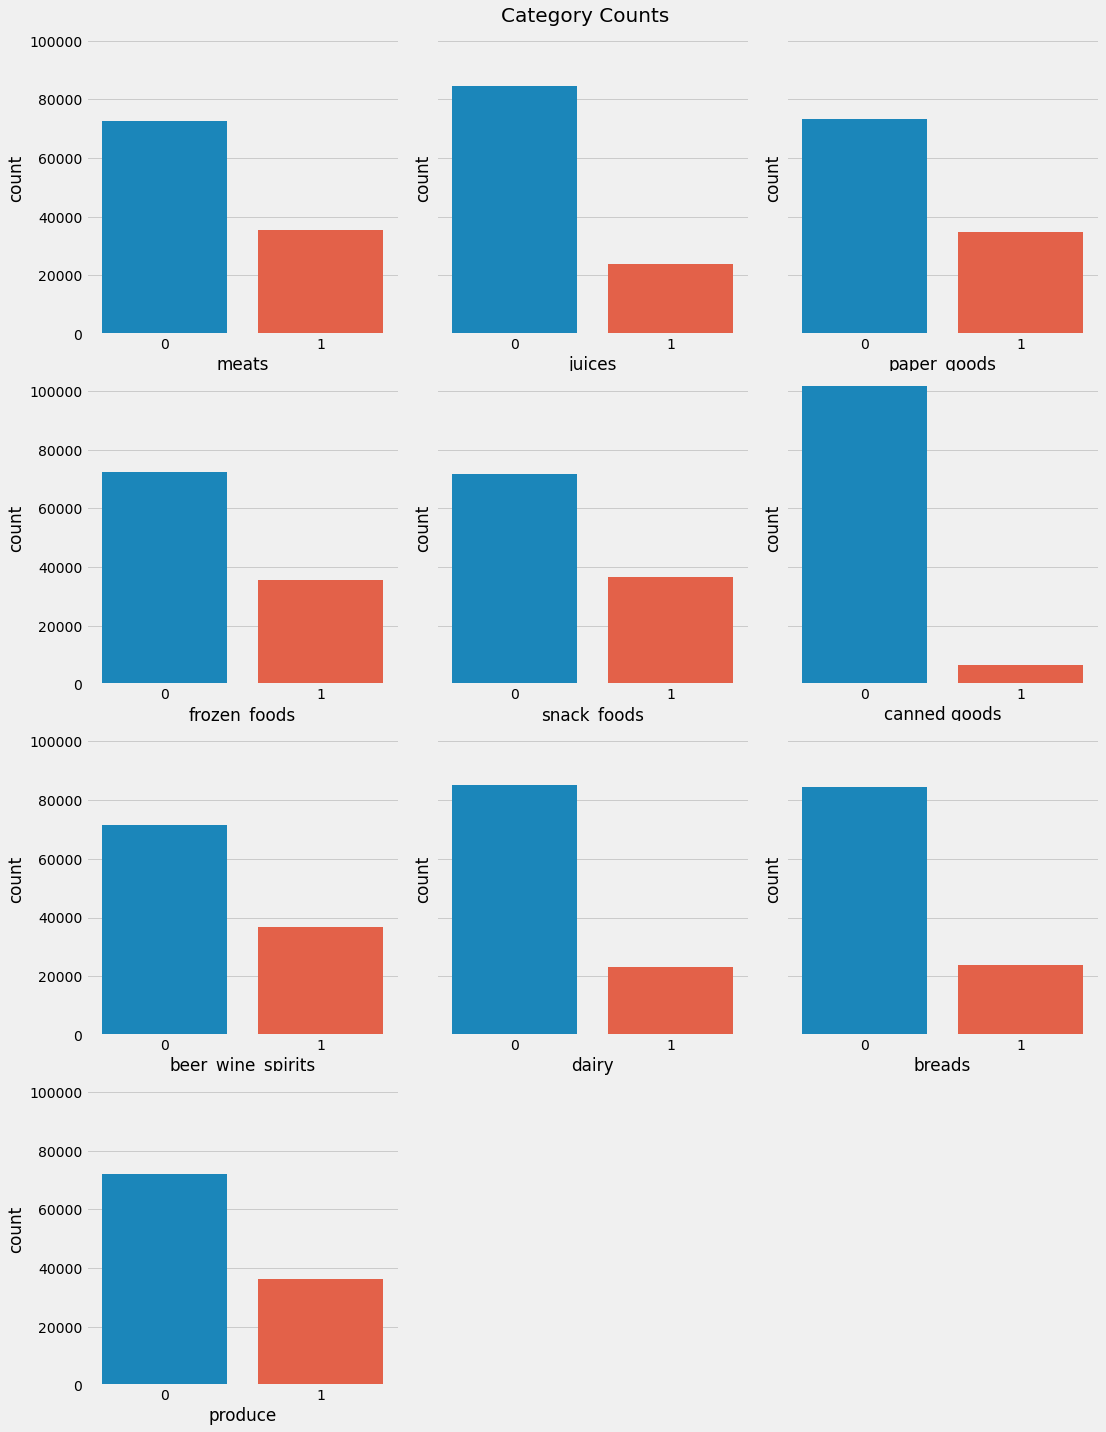

In [9]:
# counting variables using barplots
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(4, 3, figsize = (15, 20), sharey = True) # creates figure and axes
fig.tight_layout() # removes extra whitespaces
fig.subplots_adjust(top = 0.97)
fig.suptitle("Category Counts", fontsize = 20); # spacing out title

# adding plots to subplots
sns.countplot(ax = axes[0, 0], data = supermarket_data, x = relevant_col_names[0]);
sns.countplot(ax = axes[0, 1], data = supermarket_data, x = relevant_col_names[1]);
sns.countplot(ax = axes[0, 2], data = supermarket_data, x = relevant_col_names[2]);
sns.countplot(ax = axes[1, 0], data = supermarket_data, x = relevant_col_names[3]);
sns.countplot(ax = axes[1, 1], data = supermarket_data, x = relevant_col_names[4]);
sns.countplot(ax = axes[1, 2], data = supermarket_data, x = relevant_col_names[5]);
sns.countplot(ax = axes[2, 0], data = supermarket_data, x = relevant_col_names[6]);
sns.countplot(ax = axes[2, 1], data = supermarket_data, x = relevant_col_names[7]);
sns.countplot(ax = axes[2, 2], data = supermarket_data, x = relevant_col_names[8]);
sns.countplot(ax = axes[3, 0], data = supermarket_data, x = relevant_col_names[9]);
axes[-1, -1].axis("off");
axes[-1, -2].axis("off");

In [10]:
# importing apriori model and association rules
from mlxtend.frequent_patterns import apriori, association_rules

# builiding the model
freq_items = apriori(supermarket_data, min_support = 0.05, use_colnames = True)

# collecting rules in a dataframe
rules = association_rules(freq_items, metric = "lift", min_threshold = 0.05)
rules = rules.sort_values(["support", "confidence"], ascending = [False, False])

In [11]:
# top 3 single item frequent item sets
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(snack_foods),(beer_wine_spirits),0.337896,0.338534,0.190593,0.564058,1.66618,0.076204,1.517327
70,(beer_wine_spirits),(snack_foods),0.338534,0.337896,0.190593,0.562995,1.66618,0.076204,1.515096
61,(frozen_foods),(snack_foods),0.329378,0.337896,0.188188,0.571344,1.69089,0.076893,1.544606


The top three single itemset association rules with the highest levels of support and confidence are:
1. snack foods -> beer, wine, & spirits
    support: 0.191, confidence: 0.564
2. beer, wine, & spirits -> snack foods
    support: 0.191, confidence: 0.563
3. frozen_foods -> snack foods
    support: 0.188, confidence: 0.571    

In [12]:
# top 3 double item frequent item sets
rules.loc[rules["antecedents"].astype(str).str.count(",") == 1].head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,"(beer_wine_spirits, frozen_foods)",(snack_foods),0.185007,0.337896,0.154886,0.837191,2.477660,0.092373,4.066747
158,"(snack_foods, frozen_foods)",(beer_wine_spirits),0.188188,0.338534,0.154886,0.823038,2.431184,0.091178,3.737899
156,"(beer_wine_spirits, snack_foods)",(frozen_foods),0.190593,0.329378,0.154886,0.812655,2.467238,0.092109,3.579602


The top three double itemset association rules with the highest levels of support and confidence are:
1. frozen foods & beer, wine, & spirits -> snack foods
    support: 0.155, confidence: 0.837
2. frozen foods & snack foods -> beer, wine, & spirits
    support: 0.155, confidence: 0.823
3. beer, wine, & spirits & snack foods -> frozen foods
    support: 0.155, confidence: 0.813  

In [13]:
# reading in state crime dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/state_crime_data.csv"
state_crime_data = pd.read_csv(url)

In [14]:
# first five rows
state_crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
# general variable info
state_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
# general statistics for numerical variables
state_crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [17]:
# converting categorical variable to numerical
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
X = pd.DataFrame() 

for i in state_crime_data.columns :
  X[i] = label.fit_transform(state_crime_data[i])

y = X.State
X = X.iloc[:, 1:]

In [18]:
# first five rows
X.head()

,Murder,Assault,UrbanPop,Rape
0,38,30,12,26
1,29,37,4,46
2,24,41,28,40
3,26,26,5,21
4,27,38,35,45


In [19]:
# importing KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X)
clusters

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [20]:
# importing dimensionality reduction technique from decompostion module
from sklearn.decomposition import PCA

# reducing dimensionality
reduced_data = PCA(n_components = 2).fit_transform(X)
results = pd.DataFrame(reduced_data, columns = ["pca1", "pca2"])
results["label"] = clusters
results["state"] = state_crime_data["State"]
results["pca_mean"] = results[["pca1", "pca2"]].mean(axis = 1)
results = results.reindex(columns = ["state", "pca1", "pca2", "pca_mean", "label"])
results[:10]

,state,pca1,pca2,pca_mean,label
0,Alabama,-14.939549,12.737241,-1.101154,1
1,Alaska,-24.220366,10.119420,-7.050473,1
2,Arizona,-24.461912,-8.890567,-16.676240,1
3,Arkansas,-1.815182,14.179405,6.182111,2
4,California,-28.714736,-15.553092,-22.133914,1
5,Colorado,-18.913627,-12.328051,-15.620839,1
6,Connecticut,21.565770,-9.122610,6.221580,2
7,Delaware,3.188210,-0.838098,1.175056,2
8,Florida,-35.054830,-1.948906,-18.501868,1
9,Georgia,-21.129998,10.313321,-5.408338,1


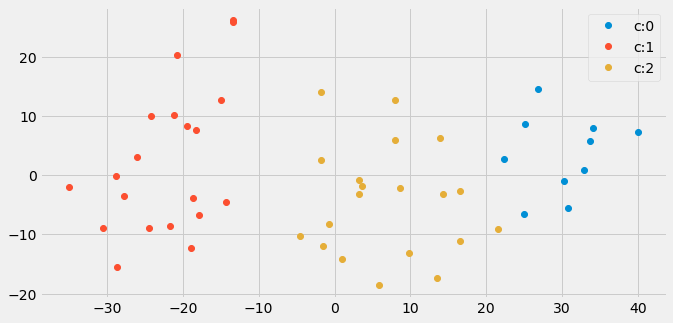

In [21]:
# plotting clusters
plt.figure(figsize = (10,5))
groups = results.groupby("label")

# iterating through grops and plotting variables
for name, group in groups:
    name = "c:" + str(name)
    plt.plot(group["pca1"], group["pca2"], marker = "o", linestyle = "", label = name);
plt.legend()
plt.show()

The principal component analysis technique reduces dimensionality to enable plotting results in a 2D plot. Cluster #0 seems to more values in the positive direction possibly indicating lower crime rates. I will average both PCAs then retrieve the top 5 states with the highest mean PCA.

In [22]:
# lowest five mean pca per cluster
lowest_five = results.sort_values(by = ["label", "pca_mean"], ascending = False).groupby("label").head(5)
lowest_five[lowest_five.label == 2].reset_index(drop = True)

,state,pca1,pca2,pca_mean,label
0,Kentucky,8.007811,12.702841,10.355326,2
1,Montana,13.902506,6.387840,10.145173,2
2,Wyoming,7.989668,6.023439,7.006553,2
3,Nebraska,16.474325,-2.631946,6.921190,2
4,Connecticut,21.565770,-9.122610,6.221580,2
5,North_Carolina,-13.358211,26.329109,6.485449,1
6,Mississippi,-13.352638,26.005404,6.326383,1
7,South_Carolina,-20.792988,20.441840,-0.175574,1
8,Alabama,-14.939549,12.737241,-1.101154,1
9,Tennessee,-18.294507,7.645560,-5.324474,1


I believe North Dakota, Vermont, West Virginia, Maine, and South Dakota have the lowest amount crime based on the mean PCA values. 

In [23]:
# reading in glass dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/glass_data.csv"
glass_data = pd.read_csv(url)

In [24]:
# first five rows
glass_data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
# variables information
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [26]:
# general numerical statistics
glass_data.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
# counting target values
glass_data.Type.value_counts(ascending = False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [28]:
# features
X = glass_data.iloc[:, 1:-1]
print(X.shape)

# target
y = glass_data.iloc[:, -1]
print(y.shape)

(214, 9)
(214,)


In [29]:
# splitting the data using K-Folds Cross Validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)
print("X_train:", len(X_train), "X_test:", len(X_test),
      "y_train:", len(X_train), "y_test:", len(X_test))

X_train: 171 X_test: 43 y_train: 171 y_test: 43


In [30]:
# importing Knn classifier
from sklearn.neighbors import KNeighborsClassifier

# creating Knn classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# importing cross_val_score function
from sklearn.model_selection import cross_val_score

# training model with 5 folds
cv_scores = cross_val_score(knn, X, y, cv = 5)
print(cv_scores)
print("mean score: {}".format(np.mean(cv_scores)))

[0.51162791 0.62790698 0.58139535 0.53488372 0.73809524]
mean score: 0.598781838316722


In [31]:
# importing GridSearchCv for parameter tuning
from sklearn.model_selection import GridSearchCV

# new instance of knn classifier
boosted_knn = KNeighborsClassifier()

# grid parameter values
params = {
    "n_neighbors": np.arange(1, 25),
    "weights": ["uniform", "distance"]
}

# testing all values in the model
grid = GridSearchCV(boosted_knn, params, cv = 5)

# fitting model to data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [32]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)
results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003192,0.000977,0.003398,0.000483,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.800000,0.735294,0.764706,0.647059,0.676471,0.724706,0.056102,1
1,0.001865,0.000454,0.002558,0.000656,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.800000,0.735294,0.764706,0.647059,0.676471,0.724706,0.056102,1
2,0.001817,0.000488,0.001898,0.000258,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.800000,0.735294,0.764706,0.647059,0.676471,0.724706,0.056102,1
3,0.001756,0.000383,0.001635,0.000490,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.714286,0.676471,0.705882,0.558824,0.735294,0.678151,0.062581,4
4,0.001816,0.000412,0.001575,0.000473,19,distance,"{'n_neighbors': 19, 'weights': 'distance'}",0.714286,0.676471,0.705882,0.558824,0.735294,0.678151,0.062581,4


One nearest neighbor with either a uniform or distance weight returns the highest mean test score of about 0.725. Let's checkout other evaluation metrics.

In [33]:
# predicting target probabilities
pred_probs = grid.predict_proba(X_test)

In [34]:
# predicting target
pred_out = grid.predict(X_test)

In [35]:
# importing scikitplot for machine learning evaluation metrics
import scikitplot as skplt

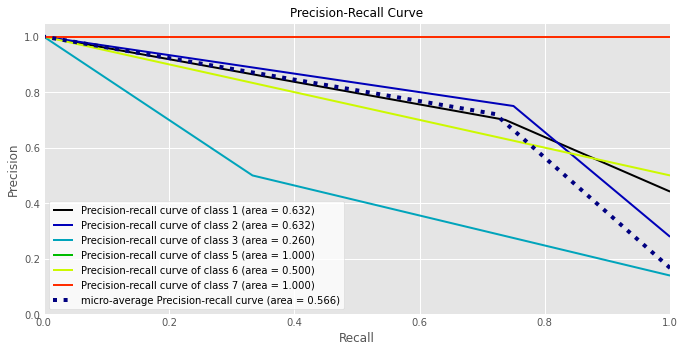

In [36]:
# plotting precision and recall curves
plt.style.use("ggplot")
skplt.metrics.plot_precision_recall(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

The micro-average elbow point is a little above 0.7 for precision and recall. Classes 5 and 7 may be overfitting since the AOC is 1 for both. Class 3 has the lowest precision and recall.

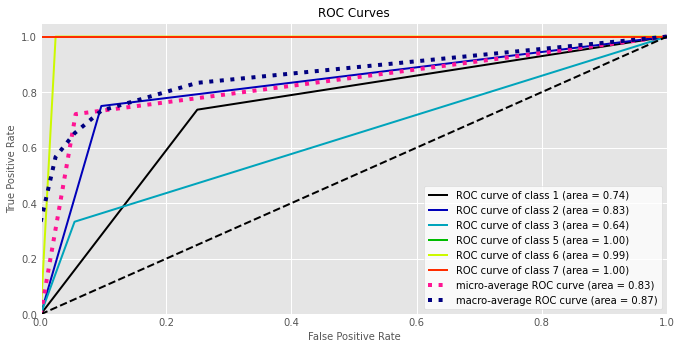

In [37]:
# plotting ROC curves
plt.style.use("ggplot")
skplt.metrics.plot_roc(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

Classes 5-7 have high AOC in the ROC plot. 

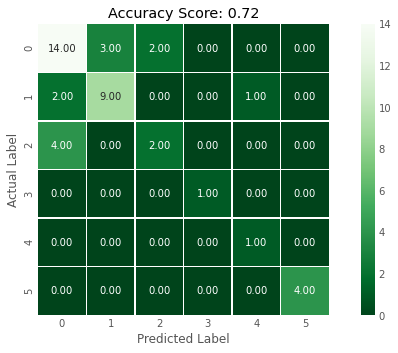

In [38]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_out)

# creating figure and plotting heatmap
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True,  cmap = "Greens_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
plt.title("Accuracy Score: {:.2f}".format(round((np.trace(cm)) / (np.sum(cm)),2)));

The accuracy score is similar on the holdout set compared to the mean accuracy score on the cross validation sets.

In [39]:
# importing evaluation metrics and itertool
from sklearn.metrics import precision_recall_fscore_support
import itertools

# creating lists containing scores and names
score_results = list(precision_recall_fscore_support(y_test, pred_out, average = "macro"))
score_names = ["precision", "recall", "fscore", "support"]

# looping through both lists and printing elements
for (score, name) in zip(score_results, score_names):
    if score != None:
        print(name, ": ", round(score, 2))
    else:
        print(name, ": ", score)

precision :  0.74
recall :  0.8
fscore :  0.76
support :  None


The precision and recall scores are higher on the holdout set. The low amount of glass training data might have something to do with the high or low evaluation metric scores.